In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from statsmodels.tsa.statespace.sarimax import SARIMAX

%matplotlib inline

# 데이터 불러오기 (count17)
2017_운영시간내_실이용객_시각별_주차장_카운트.csv

In [2]:
count17 = pd.read_csv('./data/2017_운영시간내_실이용객_시각별_주차장_카운트.csv')

In [3]:
count17['datetime'] = pd.to_datetime(count17['datetime'])

In [4]:
count17

,datetime,count
0,2017-01-01 00:00:00,0.0
1,2017-01-01 01:00:00,0.0
2,2017-01-01 02:00:00,0.0
3,2017-01-01 03:00:00,0.0
4,2017-01-01 04:00:00,0.0
...,...,...
8756,2017-12-31 20:00:00,224.0
8757,2017-12-31 21:00:00,216.0
8758,2017-12-31 22:00:00,25.0
8759,2017-12-31 23:00:00,0.0


# 데이터 불러오기 (count18)
2018_운영시간내_실이용객_시각별_주차장_카운트.csv

In [5]:
count18 = pd.read_csv('./data/2018_운영시간내_실이용객_시각별_주차장_카운트.csv')

In [6]:
count18['datetime'] = pd.to_datetime(count18['datetime'])

In [7]:
count18

,datetime,count
0,2018-01-01 00:00:00,0.0
1,2018-01-01 01:00:00,0.0
2,2018-01-01 02:00:00,0.0
3,2018-01-01 03:00:00,0.0
4,2018-01-01 04:00:00,0.0
...,...,...
740,2018-01-31 20:00:00,60.0
741,2018-01-31 21:00:00,38.0
742,2018-01-31 22:00:00,7.0
743,2018-01-31 23:00:00,0.0


## Facebook Prophet

In [8]:
from fbprophet import Prophet

In [9]:
df = count17.copy()

In [10]:
df.columns = ['ds', 'y']

In [11]:
model =Prophet()
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [12]:
future = pd.DataFrame({'ds': count18['datetime'].values})

In [13]:
prophet_predict = model.predict(future)

In [14]:
prophet_predict.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01 00:00:00,73.366147,-315.099933,109.903875,73.366147,73.366147,-178.832057,-178.832057,-178.832057,-196.470621,-196.470621,-196.470621,17.638564,17.638564,17.638564,0.0,0.0,0.0,-105.465910
1,2018-01-01 01:00:00,73.274610,-336.493166,75.246097,73.274610,73.274610,-201.423007,-201.423007,-201.423007,-209.796727,-209.796727,-209.796727,8.373719,8.373719,8.373719,0.0,0.0,0.0,-128.148398
2,2018-01-01 02:00:00,73.183073,-351.985943,64.669748,73.183073,73.183073,-208.051319,-208.051319,-208.051319,-207.444688,-207.444688,-207.444688,-0.606630,-0.606630,-0.606630,0.0,0.0,0.0,-134.868246
3,2018-01-01 03:00:00,73.091536,-347.906714,78.094508,73.091536,73.091536,-201.391152,-201.391152,-201.391152,-192.140632,-192.140632,-192.140632,-9.250520,-9.250520,-9.250520,0.0,0.0,0.0,-128.299617
4,2018-01-01 04:00:00,72.999999,-319.654909,76.565598,72.999999,72.999999,-199.014544,-199.014544,-199.014544,-181.504468,-181.504468,-181.504468,-17.510077,-17.510077,-17.510077,0.0,0.0,0.0,-126.014546


(array([736695., 736699., 736703., 736707., 736711., 736715., 736719.,
        736723., 736726.]), <a list of 9 Text xticklabel objects>)

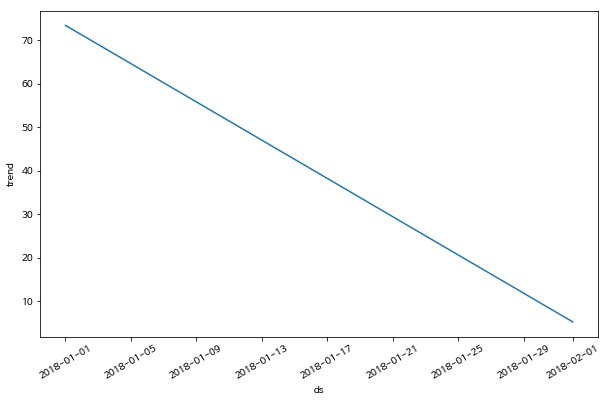

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

sns.lineplot('ds', 'trend', data=prophet_predict, ax=ax)
plt.xticks(rotation=30)

(array([736695., 736699., 736703., 736707., 736711., 736715., 736719.,
        736723., 736726.]), <a list of 9 Text xticklabel objects>)

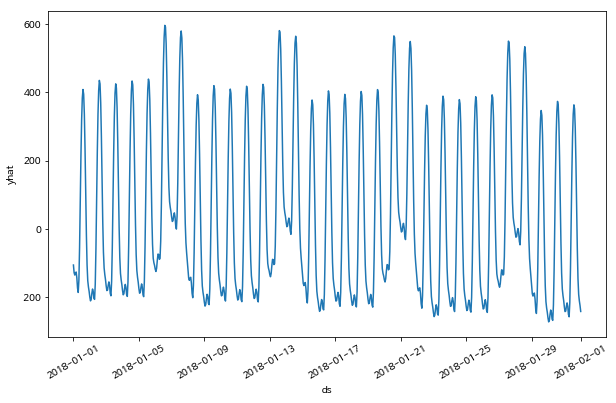

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

sns.lineplot('ds', 'yhat', data=prophet_predict, ax=ax)
plt.xticks(rotation=30)